### Packages utlisés

In [2]:
import pandas as pd
import re
import string
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams

import spacy
import spacy.cli

from pathlib import Path

import torch
from transformers import (
    TextClassificationPipeline, 
    AutoModelForSequenceClassification, 
    AutoTokenizer
)

c:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optionnel pour WordNet Lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kadas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Chargement des données 

In [4]:
# Définition du chemin de base pour un notebook Jupyter
BASE_DIR = Path.cwd().parent / "data" / "raw"

# Liste des cryptomonnaies
cryptos = [
    "binance_coin", "bitcoin", "cardano", "dogecoin",
    "ethereum", "litecoin", "shiba_inu", "solana",
    "tether", "tron", "xrp"
]

# Vérification et chargement des fichiers CSV
articles_data = {}
for crypto in cryptos:
    file_path = BASE_DIR / f"articles_{crypto}.csv"
    
    if file_path.exists():
        articles_data[crypto] = pd.read_csv(file_path)
        print(f"{crypto}: {articles_data[crypto].shape}")
    else:
        print(f"⚠️ Fichier manquant : {file_path}")


binance_coin: (1190, 3)
bitcoin: (1050, 3)
cardano: (901, 3)
dogecoin: (1350, 3)
ethereum: (3043, 3)
litecoin: (136, 3)
shiba_inu: (1161, 3)
solana: (2654, 3)
tether: (531, 3)
tron: (3820, 3)
xrp: (1638, 3)


In [5]:
# Base directory
BASE_DIR = r"C:/Users/kadas/Desktop/Mes_cours/FINANCE_QUAN/Projet_finance_quantitative/data/raw"

binance_coin_articles = pd.read_csv(f"{BASE_DIR}/articles_binance_coin.csv")
bitcoin_articles = pd.read_csv(f"{BASE_DIR}/articles_bitcoin.csv")
cardano_articles = pd.read_csv(f"{BASE_DIR}/articles_cardano.csv")
dogecoin_articles = pd.read_csv(f"{BASE_DIR}/articles_dogecoin.csv")
ethereum_articles = pd.read_csv(f"{BASE_DIR}/articles_ethereum.csv")
litecoin_articles = pd.read_csv(f"{BASE_DIR}/articles_litecoin.csv")
shiba_inu_articles = pd.read_csv(f"{BASE_DIR}/articles_shiba_inu.csv")
solana_articles = pd.read_csv(f"{BASE_DIR}/articles_solana.csv")
tether_articles = pd.read_csv(f"{BASE_DIR}/articles_tether.csv")
tron_articles = pd.read_csv(f"{BASE_DIR}/articles_tron.csv")
xrp_articles = pd.read_csv(f"{BASE_DIR}/articles_xrp.csv")


In [6]:
print(
    binance_coin_articles.shape,
    bitcoin_articles.shape,
    cardano_articles.shape,
    dogecoin_articles.shape,
    ethereum_articles.shape,
    litecoin_articles.shape,
    shiba_inu_articles.shape,
    solana_articles.shape,
    tether_articles.shape,
    tron_articles.shape,
    xrp_articles.shape
)

(1190, 3) (1050, 3) (901, 3) (1350, 3) (3043, 3) (136, 3) (1161, 3) (2654, 3) (531, 3) (3820, 3) (1638, 3)


#### Vérification des news sans date renseignée

In [7]:
# Vérification des news sans date renseignée
inconnu_counts = {crypto: df["date"].eq("Inconnu").sum() for crypto, df in articles_data.items()}

# Affichage des résultats
for crypto, count in inconnu_counts.items():
    print(f"{crypto}: {count} lignes avec 'Inconnu'")


binance_coin: 28 lignes avec 'Inconnu'
bitcoin: 24 lignes avec 'Inconnu'
cardano: 8 lignes avec 'Inconnu'
dogecoin: 13 lignes avec 'Inconnu'
ethereum: 8 lignes avec 'Inconnu'
litecoin: 15 lignes avec 'Inconnu'
shiba_inu: 5 lignes avec 'Inconnu'
solana: 14 lignes avec 'Inconnu'
tether: 13 lignes avec 'Inconnu'
tron: 6 lignes avec 'Inconnu'
xrp: 10 lignes avec 'Inconnu'


In [8]:
# Charger les fichiers dans des DataFrames
crypto_dfs = {
    "Binance Coin": binance_coin_articles,
    "Bitcoin": bitcoin_articles,
    "Cardano": cardano_articles,
    "Dogecoin": dogecoin_articles,
    "Ethereum": ethereum_articles,
    "Litecoin": litecoin_articles,
    "Shiba Inu": shiba_inu_articles,
    "Solana": solana_articles,
    "Tether": tether_articles,
    "Tron": tron_articles,
    "XRP": xrp_articles,
}

# Vérification des news sans date renseignée
inconnu_counts = {crypto: df["date"].eq("Inconnu").sum() for crypto, df in crypto_dfs.items()}

# Afficher les résultats
for crypto, count in inconnu_counts.items():
    print(f"{crypto}: {count} lignes avec 'Inconnu'")

Binance Coin: 28 lignes avec 'Inconnu'
Bitcoin: 24 lignes avec 'Inconnu'
Cardano: 8 lignes avec 'Inconnu'
Dogecoin: 13 lignes avec 'Inconnu'
Ethereum: 8 lignes avec 'Inconnu'
Litecoin: 15 lignes avec 'Inconnu'
Shiba Inu: 5 lignes avec 'Inconnu'
Solana: 14 lignes avec 'Inconnu'
Tether: 13 lignes avec 'Inconnu'
Tron: 6 lignes avec 'Inconnu'
XRP: 10 lignes avec 'Inconnu'


#### Fusion des bases de données sur les différentes cryptomonnaies

In [9]:
# 🔹 Fusionner toutes les bases de données en un seul DataFrame
df_crypto = pd.concat(articles_data.values(), ignore_index=True)

# 🔹 Vérification de la fusion
print(f"✅ Fusion réussie ! Nombre total de lignes : {df_crypto.shape[0]}")
print(f"✅ Aperçu des colonnes du DataFrame fusionné : {df_crypto.columns}")


✅ Fusion réussie ! Nombre total de lignes : 17474
✅ Aperçu des colonnes du DataFrame fusionné : Index(['title', 'date', 'description'], dtype='object')


In [16]:
# # 🔹 Liste contenant toutes les bases de données
# dfs = [
#     binance_coin_articles, bitcoin_articles, cardano_articles, dogecoin_articles, 
#     ethereum_articles, litecoin_articles, shiba_inu_articles, solana_articles, 
#     tether_articles, tron_articles, xrp_articles
# ]

# # 🔹 Fusionner toutes les bases de données en un seul DataFrame
# df_crypto = pd.concat(dfs, ignore_index=True)

# # 🔹 Vérification de la fusion
# print(f"✅ Fusion réussie ! Nombre total de lignes : {df_crypto.shape[0]}")
# print(f"✅ Aperçu des colonnes du DataFrame fusionné : {df_crypto.columns}")

In [18]:
df_crypto.tail(5)

,title,date,description
17469,Mineable Coin in Cryptocurrency,Inconnu,Cryptocurrency mining is a novel concept in mo...
17470,CryptoWallet,Inconnu,Ready to enter the world of crypto banking? Cr...
17471,crypto prices today,Inconnu,To stay updated with the latest developments i...
17472,BC.Game: A Crypto Gaming Platform,Inconnu,BC.Game offers gamers an exciting way of earni...
17473,KuCoin: A Spot and Derivatives Crypto Exchange,Inconnu,KuCoin is a major cryptocurrency exchange that...


#### Suppresion de certaines lignes (valeurs manquantes) 

In [19]:
def clean_dataframe(df):
    # 🔹 Supprimer les lignes où "date" contient "Inconnu" (gère les NaN)
    df = df[df["date"].astype(str).str.lower() != "inconnu"]

    # 🔹 Supprimer les lignes où "description" est vide ou NaN
    df = df.dropna(subset=["description"])  # Supprime les NaN
    df = df[df["description"].str.strip() != ""]  # Supprime les descriptions vides

    return df.reset_index(drop=True)  # Réinitialiser l'index après suppression

# 📌 Appliquer la fonction au DataFrame
df_crypto = clean_dataframe(df_crypto)

In [20]:
clean_dataframe(df_crypto)

,title,date,description
0,Binance coin’s strong year falters as 1Fuel dr...,2025-02-05 13:47:00,Binance coin drops 17% in a month as investors...
1,"Cryptos to watch in 2025: Rollblock, Cardano, ...",2025-01-23 20:55:00,Not all fast-growing crypto tokens are good in...
2,"Remittix could outperform Shiba Inu, Cardano a...",2025-01-23 13:02:00,Remittix is making waves in the crypto industr...
3,Binance Coin drops despite flipping Ethereum i...,2025-01-20 17:45:00,Binance Coin price remained in a tight range o...
4,Why this crypto could outshine Binance Coin an...,2025-01-16 09:50:00,As the crypto market gears up for its next bul...
...,...,...,...
17325,"Tether’s USDT is dominant, but for how long?",2024-08-13 08:15:00,With the rise of the Markets in Crypto-Assets ...
17326,Superstate integrates Chainlink for tokenized ...,2024-08-12 19:44:00,"Superstate, a blockchain-based asset managemen..."
17327,SEC charges NovaTech over $650m crypto fraud,2024-08-12 18:11:00,The U.S. Securities and Exchange Commission ch...
17328,"Rollblock aims to mimic SHIB, KAS gains with u...",2024-08-12 13:41:00,Shiba Inu and Kaspa have made investors wealth...


#### Création de la colonne "cryptocurrency"

In [22]:
# Dictionnaire de correspondance pour les cryptos (normalisation)
crypto_mapping = {
    "Ethereum": "ETH", "ETH": "ETH",
    "Bitcoin": "BTC", "BTC": "BTC",
    "Solana": "SOL", "SOL": "SOL",
    "Cardano": "ADA", "ADA": "ADA",
    "XRP": "XRP",
    "Dogecoin": "DOGE", "DOGE": "DOGE",
    "Binance Coin": "BNB", "BNB": "BNB",
    "Litecoin": "LTC", "LTC": "LTC",
    "Shiba Inu": "SHIB", "SHIB": "SHIB",
    "Tron": "TRX", "TRX": "TRX",
    "Tether": "USDT", "USDT": "USDT"
}

# Fonction pour détecter les cryptos dans un texte
def find_primary_crypto(text):
    if pd.isna(text):  # Gérer les valeurs NaN
        return None
    
    text = str(text)  # S'assurer que la valeur est bien une string

    for key, value in crypto_mapping.items():
        pattern = rf'\b{re.escape(key)}\b'  # Recherche de mot exact
        if re.search(pattern, text, re.IGNORECASE):  # Ignore majuscules/minuscules
            return value  # Retourne la première crypto trouvée
    
    return None  # Aucune crypto trouvée

# Fonction principale : chercher d'abord dans description, puis titre si nécessaire
def detect_crypto(row):
    primary_crypto = find_primary_crypto(row["description"])
    
    if primary_crypto is None:  # Si aucune crypto trouvée dans la description, on regarde dans le titre
        primary_crypto = find_primary_crypto(row["title"])
    
    return primary_crypto

In [23]:
# Appliquer la fonction sur chaque ligne du DataFrame
df_crypto["cryptocurrency"] = df_crypto.apply(detect_crypto, axis=1)

In [24]:
# Affichage du DataFrame final
df_crypto.head(5)

,title,date,description,cryptocurrency
0,Binance coin’s strong year falters as 1Fuel dr...,2025-02-05 13:47:00,Binance coin drops 17% in a month as investors...,BNB
1,"Cryptos to watch in 2025: Rollblock, Cardano, ...",2025-01-23 20:55:00,Not all fast-growing crypto tokens are good in...,ADA
2,"Remittix could outperform Shiba Inu, Cardano a...",2025-01-23 13:02:00,Remittix is making waves in the crypto industr...,ADA
3,Binance Coin drops despite flipping Ethereum i...,2025-01-20 17:45:00,Binance Coin price remained in a tight range o...,ETH
4,Why this crypto could outshine Binance Coin an...,2025-01-16 09:50:00,As the crypto market gears up for its next bul...,BNB


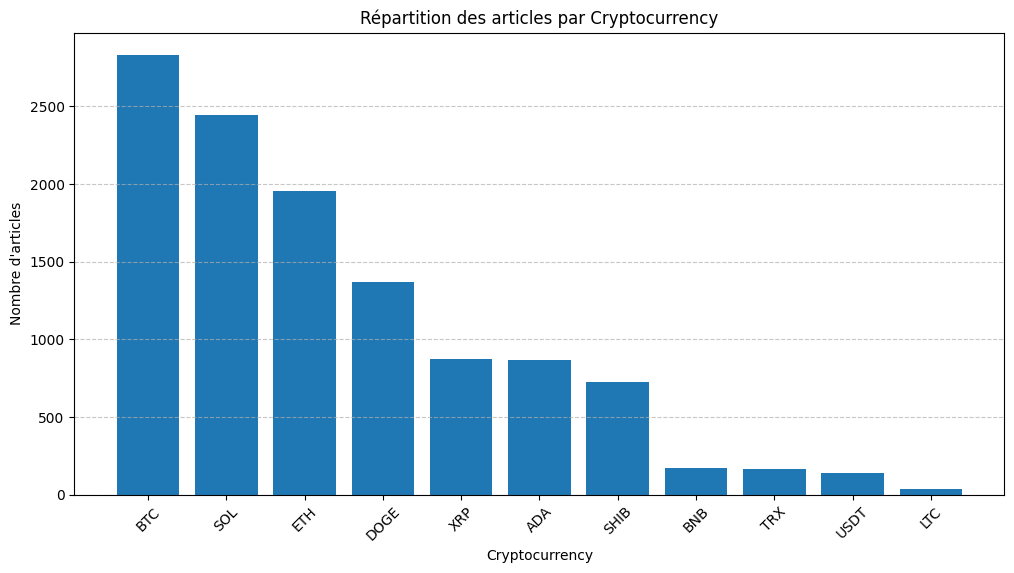

In [25]:
# Compter le nombre d'occurrences de chaque crypto
crypto_counts = df_crypto["cryptocurrency"].value_counts()

# Créer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(crypto_counts.index, crypto_counts.values)
plt.xlabel("Cryptocurrency")
plt.ylabel("Nombre d'articles")
plt.title("Répartition des articles par Cryptocurrency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

### Preprocessing des données textuelles

In [26]:
spacy.cli.download("en_core_web_sm")

# Charger le modèle Spacy pour l'anglais
nlp = spacy.load("en_core_web_sm")

# Liste des mots à exclure (stopwords personnalisés)
custom_stop_words = [
    'http', 'https', 'www', 'com', 'crypto', 'cryptocurrency', 'bitcoin', 'btc',
    'ethereum', 'eth', 'blockchain', 'today', 'tonight', 'actually', 'lol', 
    'day', 'hour', 'minute', 'sec', 'talk', 'price', 'market', 'coin'
]

# Fonction de preprocessing
def crypto_text_preprocessing(text):
    # 1. Suppression des URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    # 2. Suppression des mentions et hashtags (Twitter style)
    text = re.sub(r'@\w+|#\w+', '', text)
    # 3. Suppression des balises HTML
    text = re.sub(r'<.*?>', '', text)
    # 4. Conservation uniquement des mots alphanumériques
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    # 5. Conversion en minuscules
    text = text.lower()
    
    # 6. Tokenisation, suppression des stopwords et lemmatisation via Spacy
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop                  # Exclure les stopwords Spacy
        and token.text not in custom_stop_words  # Exclure les stopwords personnalisés
        and len(token.text) > 2               # Exclure les mots de moins de 3 caractères
        and token.is_alpha                   # Conserver uniquement les mots alphanumériques
    ]
    
    # 7. Génération de bigrammes (sans répétition des mots)
    bigram_list = [
        '_'.join(bigram) for bigram in bigrams(tokens)
        if bigram[0] not in tokens or bigram[1] not in tokens  # Vérifie que les mots ne sont pas déjà présents
    ]
    
    # 8. Reconstruction du texte nettoyé (ajout uniquement de bigrammes non répétitifs)
    text_cleaned = ' '.join(tokens + bigram_list)
    
    return text_cleaned


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Application de la fonction de preprocessing 

In [27]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "description"
df_crypto = df_crypto.dropna(subset=["description"])

In [28]:
df_crypto["cleaned_description"] = df_crypto["description"].apply(crypto_text_preprocessing)

In [29]:
df_crypto[["description", "cleaned_description"]].head()

,description,cleaned_description
0,Binance coin drops 17% in a month as investors...,binance drop month investor turn rise gain att...
1,Not all fast-growing crypto tokens are good in...,fastgrowe token good investment rollblock card...
2,Remittix is making waves in the crypto industr...,remittix make wave industry smart approach cro...
3,Binance Coin price remained in a tight range o...,binance remain tight range monday network surp...
4,As the crypto market gears up for its next bul...,gear bull run lightchain emerge potential game...


In [30]:
df_crypto

,title,date,description,cryptocurrency,cleaned_description
0,Binance coin’s strong year falters as 1Fuel dr...,2025-02-05 13:47:00,Binance coin drops 17% in a month as investors...,BNB,binance drop month investor turn rise gain att...
1,"Cryptos to watch in 2025: Rollblock, Cardano, ...",2025-01-23 20:55:00,Not all fast-growing crypto tokens are good in...,ADA,fastgrowe token good investment rollblock card...
2,"Remittix could outperform Shiba Inu, Cardano a...",2025-01-23 13:02:00,Remittix is making waves in the crypto industr...,ADA,remittix make wave industry smart approach cro...
3,Binance Coin drops despite flipping Ethereum i...,2025-01-20 17:45:00,Binance Coin price remained in a tight range o...,ETH,binance remain tight range monday network surp...
4,Why this crypto could outshine Binance Coin an...,2025-01-16 09:50:00,As the crypto market gears up for its next bul...,BNB,gear bull run lightchain emerge potential game...
...,...,...,...,...,...
17325,"Tether’s USDT is dominant, but for how long?",2024-08-13 08:15:00,With the rise of the Markets in Crypto-Assets ...,USDT,rise market cryptoasset regulation europe ques...
17326,Superstate integrates Chainlink for tokenized ...,2024-08-12 19:44:00,"Superstate, a blockchain-based asset managemen...",None,superstate blockchainbase asset management fir...
17327,SEC charges NovaTech over $650m crypto fraud,2024-08-12 18:11:00,The U.S. Securities and Exchange Commission ch...,None,securities exchange commission charge obscure ...
17328,"Rollblock aims to mimic SHIB, KAS gains with u...",2024-08-12 13:41:00,Shiba Inu and Kaspa have made investors wealth...,SHIB,shiba inu kaspa investor wealthy rollblock poi...


#### Modèle CryptoBERT

In [31]:
print("Torch version:", torch.__version__)
print("GPU available:", torch.cuda.is_available())

model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

print("Model loaded successfully!")

Torch version: 2.6.0+cpu
GPU available: False
Model loaded successfully!


#### Création du modèle

In [32]:
# Spécifier le modèle pré-entraîné CryptoBERT
model_name = "ElKulako/cryptobert"

# Charger le tokenizer pour convertir le texte brut en tokens
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

# Charger le modèle pré-entraîné pour la classification des sentiments (3 classes)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Configurer le pipeline combinant le modèle et le tokenizer
pipe = TextClassificationPipeline(
    model=model,           # Modèle CryptoBERT
    tokenizer=tokenizer,   # Tokenizer associé
    max_length=128,        # Limite de longueur des séquences
    truncation=True,       # Tronquer les séquences longues
    padding='max_length'   # Ajouter du padding pour uniformiser la longueur
)

Device set to use cpu


#### Classification des news selon le sentiment (positif, neutre, négatif)

In [33]:
def classify_sentiment(text):
    """
    Fonction pour classer le sentiment d'un texte à l'aide de CryptoBERT.
    """
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        # Si le texte est vide ou inexistant
        return {"label": "Unknown", "score": 0.0}
    
    # Appliquer le pipeline de classification
    prediction = pipe(text)[0]  # La première prédiction
    return {"label": prediction["label"], "score": prediction["score"]}

In [34]:
# Tourne pendant 1h max
df_crypto["sentiment"] = df_crypto["cleaned_description"].apply(classify_sentiment)

# Extraire les labels et scores dans des colonnes séparées
df_crypto["sentiment_label"] = df_crypto["sentiment"].apply(lambda x: x["label"])
df_crypto["sentiment_score"] = df_crypto["sentiment"].apply(lambda x: x["score"])

In [45]:
df_crypto.columns

Index(['title', 'date', 'description', 'cryptocurrency', 'cleaned_description',
       'sentiment', 'sentiment_label', 'sentiment_score', 'date_only',
       'time_only', 'sentiment_coded', 'story_level_sentiment'],
      dtype='object')

In [47]:
# Vérifier si la colonne sentiment_label contient les prédictions
if "sentiment_label" in df_crypto.columns:
    # Calculer les pourcentages pour chaque label
    sentiment_counts = df_crypto["sentiment_label"].value_counts(normalize=True) * 100
    
    # Convertir en DataFrame pour une meilleure présentation
    sentiment_percentages = sentiment_counts.reset_index()
    sentiment_percentages.columns = ["Sentiment", "Percentage"]
    
    # Afficher les pourcentages
    print(sentiment_percentages)
else:
    print("La colonne 'sentiment_label' est absente. Assurez-vous d'avoir appliqué la classification.")

  Sentiment  Percentage
0   Neutral   65.886923
1   Bullish   33.284420
2   Bearish    0.828658


#### Décomposer la date en deux nouvelles variables 



In [48]:
def split_datetime(df, date_column="date"):

    # Convertir en datetime (ignorer les erreurs pour éviter les problèmes avec "Inconnu")
    df[date_column] = pd.to_datetime(df[date_column], errors="coerce")

    # Création des nouvelles colonnes
    df["date_only"] = df[date_column].dt.date  # Extraire uniquement la date (format YYYY-MM-DD)
    df["time_only"] = df[date_column].dt.time  # Extraire uniquement l'heure (format HH:MM:SS)

    return df

In [49]:
df_crypto = split_datetime(df_crypto,date_column="date")

C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\1601505233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors="coerce")
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\1601505233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_only"] = df[date_column].dt.date  # Extraire uniquement la date (format YYYY-MM-DD)
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\1601505233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a c

In [50]:
def encode_sentiment(df):
    """
    Ajoute une colonne 'sentiment_coded' avec des valeurs numériques basées sur 'sentiment_label'.
    - 'Bullish'  → +1
    - 'Neutral'  →  0
    - 'Bearish'  → -1
    """
    # 🔹 Définition du mapping
    sentiment_mapping = {"Bullish": 1, "Neutral": 0, "Bearish": -1}

    # 🔹 Création de la nouvelle colonne
    df["sentiment_coded"] = df["sentiment_label"].map(sentiment_mapping)

    return df

In [51]:
encode_sentiment(df_crypto)

C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\1808257759.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_coded"] = df["sentiment_label"].map(sentiment_mapping)


,title,date,description,cryptocurrency,cleaned_description,sentiment,sentiment_label,sentiment_score,date_only,time_only,sentiment_coded,story_level_sentiment
0,Binance coin’s strong year falters as 1Fuel dr...,2025-02-05 13:47:00,Binance coin drops 17% in a month as investors...,BNB,binance drop month investor turn rise gain att...,"{'label': 'Bullish', 'score': 0.7197684049606323}",Bullish,0.719768,2025-02-05,13:47:00,1,0.719768
1,"Cryptos to watch in 2025: Rollblock, Cardano, ...",2025-01-23 20:55:00,Not all fast-growing crypto tokens are good in...,ADA,fastgrowe token good investment rollblock card...,"{'label': 'Bullish', 'score': 0.6345741152763367}",Bullish,0.634574,2025-01-23,20:55:00,1,0.634574
2,"Remittix could outperform Shiba Inu, Cardano a...",2025-01-23 13:02:00,Remittix is making waves in the crypto industr...,ADA,remittix make wave industry smart approach cro...,"{'label': 'Neutral', 'score': 0.880464494228363}",Neutral,0.880464,2025-01-23,13:02:00,0,0.000000
3,Binance Coin drops despite flipping Ethereum i...,2025-01-20 17:45:00,Binance Coin price remained in a tight range o...,ETH,binance remain tight range monday network surp...,"{'label': 'Bullish', 'score': 0.5288228988647461}",Bullish,0.528823,2025-01-20,17:45:00,1,0.528823
4,Why this crypto could outshine Binance Coin an...,2025-01-16 09:50:00,As the crypto market gears up for its next bul...,BNB,gear bull run lightchain emerge potential game...,"{'label': 'Neutral', 'score': 0.544438898563385}",Neutral,0.544439,2025-01-16,09:50:00,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17321,"Smart money earns big on Cardano, PEPE, and th...",2024-08-16 18:00:00,"Cardano, PEPE, and a new contender, RCO Financ...",ADA,cardano pepe new contender rco finance catch e...,"{'label': 'Neutral', 'score': 0.8009620904922485}",Neutral,0.800962,2024-08-16,18:00:00,0,0.000000
17322,"Experts back new crypto over Ripple, Ethereum ...",2024-08-14 18:39:00,DTX Exchange is drawing major attention with a...,ETH,dtx exchange draw major attention return far e...,"{'label': 'Neutral', 'score': 0.8507812023162842}",Neutral,0.850781,2024-08-14,18:39:00,0,0.000000
17324,"Spike in SHIB, DOGE sell orders trigger panic ...",2024-08-13 10:51:00,Market players are troubled by bearish indicat...,DOGE,player trouble bearish indication shiba inu do...,"{'label': 'Neutral', 'score': 0.5078198313713074}",Neutral,0.507820,2024-08-13,10:51:00,0,0.000000
17325,"Tether’s USDT is dominant, but for how long?",2024-08-13 08:15:00,With the rise of the Markets in Crypto-Assets ...,USDT,rise market cryptoasset regulation europe ques...,"{'label': 'Bullish', 'score': 0.5762612223625183}",Bullish,0.576261,2024-08-13,08:15:00,1,0.576261


In [52]:
def compute_sentiment_features(df_news):
    """
    Calcule les story-level sentiments et company-level sentiments (daily sentiment).

    Args:
        df_news (pd.DataFrame): DataFrame contenant :
            - 'date_only' : Date de la news.
            - 'cryptocurrency' : Crypto concernée.
            - 'sentiment_score' : Confiance du sentiment (0 à 1).
            - 'sentiment_label' : Label du sentiment ("Bullish", "Neutral", "Bearish").

    Returns:
        pd.DataFrame: DataFrame avec les colonnes sentiment_daily (company-level sentiment).
    """
    # Vérifier les colonnes nécessaires
    required_columns = ["date_only", "cryptocurrency", "sentiment_score", "sentiment_label"]
    for col in required_columns:
        if col not in df_news.columns:
            raise KeyError(f"La colonne '{col}' est absente du DataFrame.")

    # Story-level sentiment
    sentiment_mapping = {"Bullish": 1, "Neutral": 0, "Bearish": -1}
    df_news["sentiment_coded"] = df_news["sentiment_label"].map(sentiment_mapping)
    df_news["story_level_sentiment"] = df_news["sentiment_coded"] * df_news["sentiment_score"]

    # Company-level sentiment (daily sentiment)
    df_daily = df_news.groupby(["date_only", "cryptocurrency"]).apply(
        lambda x: x["story_level_sentiment"].sum() / x["sentiment_score"].sum() if x["sentiment_score"].sum() != 0 else 0
    ).reset_index(name="sentiment_daily")

    return df_daily

In [53]:
df_crypto = df_crypto[df_crypto["cryptocurrency"].notna() & (df_crypto["cryptocurrency"] != "None")]

In [54]:
df_crypto.columns

Index(['title', 'date', 'description', 'cryptocurrency', 'cleaned_description',
       'sentiment', 'sentiment_label', 'sentiment_score', 'date_only',
       'time_only', 'sentiment_coded', 'story_level_sentiment'],
      dtype='object')

In [55]:
df_daily = compute_sentiment_features(df_crypto)

C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\2504485236.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_daily = df_news.groupby(["date_only", "cryptocurrency"]).apply(


In [101]:
df_daily
df_daily.to_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw/crypto_news_sentiments.csv", index=False)

In [102]:
df_daily.isnull().mean()*100

date_only          0.0
cryptocurrency     0.0
sentiment_daily    0.0
Close              0.0
Open               0.0
High               0.0
Low                0.0
Volume             0.0
dtype: float64

In [103]:
print(df_crypto["cleaned_description"])  # Vérifie quelques lignes

0        binance drop month investor turn rise gain att...
1        fastgrowe token good investment rollblock card...
2        remittix make wave industry smart approach cro...
3        binance remain tight range monday network surp...
4        gear bull run lightchain emerge potential game...
5        amid bull binance holder turn lightchain smart...
6        analyst gvr predicts binance hit lnex xrp gain...
7        bnb sol face resistance whale flock rollblock ...
8        bnb remain strong litecoin struggle bnb ltc ho...
9        explore crypto staying power solana binance ca...
10       strong gain solana binance investor eye rollbl...
11       bull run loom expert spotlight binance intel m...
12       dogecoin binance whale turn attention intel ma...
13       binance coin rally gain momentum future open i...
14       binance near protocol offer limited return new...
15       vine solanabase meme launch vine cofounder rus...
16       melania trump soar high binance announce provi.

In [104]:
print(df_daily.head(15))
print(df_daily.shape)

    date_only cryptocurrency  sentiment_daily         Close          Open  \
0  2024-08-11            BTC         0.000000  58719.484375  60944.890625   
1  2024-08-11           SHIB         0.000000      0.000013      0.000014   
2  2024-08-12            BTC         0.000000  59354.515625  58719.394531   
3  2024-08-12            ETH         0.146439   2724.431885   2553.496582   
4  2024-08-12           SHIB         1.000000      0.000014      0.000013   
5  2024-08-12           USDT         0.000000      1.000180      1.000047   
6  2024-08-13            BTC         0.034006  60609.566406  59356.207031   
7  2024-08-13           DOGE         0.000000      0.106416      0.107767   
8  2024-08-13            ETH         0.000000   2703.671875   2724.303467   
9  2024-08-13            SOL         0.000000    146.712692    146.454559   
10 2024-08-13           USDT         0.838156      1.000266      1.000263   
11 2024-08-14            ADA         0.379907      0.335455      0.340146   

In [106]:
df_final = df_crypto.merge(df_daily, on=["date_only", "cryptocurrency"], how="left")

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'date_only'. If you wish to proceed you should use pd.concat

In [107]:
df_crypto.to_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw/crypto_news_cleaned.csv", index=False)

In [108]:
df_crypto.columns
df_crypto.isnull().mean() * 100


title                    0.0
date                     0.0
description              0.0
cryptocurrency           0.0
cleaned_description      0.0
sentiment                0.0
sentiment_label          0.0
sentiment_score          0.0
date_only                0.0
time_only                0.0
sentiment_coded          0.0
story_level_sentiment    0.0
dtype: float64

In [109]:
print(df_crypto["cleaned_description"])  # Vérifie quelques lignes

0        binance drop month investor turn rise gain att...
1        fastgrowe token good investment rollblock card...
2        remittix make wave industry smart approach cro...
3        binance remain tight range monday network surp...
4        gear bull run lightchain emerge potential game...
5        amid bull binance holder turn lightchain smart...
6        analyst gvr predicts binance hit lnex xrp gain...
7        bnb sol face resistance whale flock rollblock ...
8        bnb remain strong litecoin struggle bnb ltc ho...
9        explore crypto staying power solana binance ca...
10       strong gain solana binance investor eye rollbl...
11       bull run loom expert spotlight binance intel m...
12       dogecoin binance whale turn attention intel ma...
13       binance coin rally gain momentum future open i...
14       binance near protocol offer limited return new...
15       vine solanabase meme launch vine cofounder rus...
16       melania trump soar high binance announce provi.

In [112]:
df_final.head(5)

,title,date,description,cryptocurrency,cleaned_description,sentiment,sentiment_label,sentiment_score,date_only,time_only,sentiment_coded,story_level_sentiment,sentiment_daily
0,Binance coin’s strong year falters as 1Fuel dr...,2025-02-05 13:47:00,Binance coin drops 17% in a month as investors...,BNB,binance drop month investor turn rise gain att...,"{'label': 'Bullish', 'score': 0.7197684049606323}",Bullish,0.719768,2025-02-05,13:47:00,1,0.719768,0.871529
1,"Cryptos to watch in 2025: Rollblock, Cardano, ...",2025-01-23 20:55:00,Not all fast-growing crypto tokens are good in...,ADA,fastgrowe token good investment rollblock card...,"{'label': 'Bullish', 'score': 0.6345741152763367}",Bullish,0.634574,2025-01-23,20:55:00,1,0.634574,0.295720
2,"Remittix could outperform Shiba Inu, Cardano a...",2025-01-23 13:02:00,Remittix is making waves in the crypto industr...,ADA,remittix make wave industry smart approach cro...,"{'label': 'Neutral', 'score': 0.880464494228363}",Neutral,0.880464,2025-01-23,13:02:00,0,0.000000,0.295720
3,Binance Coin drops despite flipping Ethereum i...,2025-01-20 17:45:00,Binance Coin price remained in a tight range o...,ETH,binance remain tight range monday network surp...,"{'label': 'Bullish', 'score': 0.5288228988647461}",Bullish,0.528823,2025-01-20,17:45:00,1,0.528823,0.221931
4,Why this crypto could outshine Binance Coin an...,2025-01-16 09:50:00,As the crypto market gears up for its next bul...,BNB,gear bull run lightchain emerge potential game...,"{'label': 'Neutral', 'score': 0.544438898563385}",Neutral,0.544439,2025-01-16,09:50:00,0,0.000000,0.000000


In [113]:
crypto_prices = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\crypto_prices_historical_12.csv")

In [114]:
# Convertir la colonne "Date" en datetime si ce n'est pas déjà fait
crypto_prices['Date'] = pd.to_datetime(crypto_prices['Date'], errors='coerce')

# Supprimer les valeurs NaN dans la colonne "Date" si elles existent
crypto_prices = crypto_prices.dropna(subset=['Date'])

# Trouver la dernière date
last_date = crypto_prices['Date'].max()
print(f"La dernière date est : {last_date}")

La dernière date est : 2025-02-08 00:00:00


In [116]:
crypto_prices.head(5)

,Date,BTC-USD_Open,BTC-USD_High,BTC-USD_Low,BTC-USD_Close,BTC-USD_Volume,ETH-USD_Open,ETH-USD_High,ETH-USD_Low,ETH-USD_Close,ETH-USD_Volume,BNB-USD_Open,BNB-USD_High,BNB-USD_Low,BNB-USD_Close,BNB-USD_Volume,SOL-USD_Open,SOL-USD_High,SOL-USD_Low,SOL-USD_Close,SOL-USD_Volume,XRP-USD_Open,XRP-USD_High,XRP-USD_Low,XRP-USD_Close,XRP-USD_Volume,ADA-USD_Open,ADA-USD_High,ADA-USD_Low,ADA-USD_Close,ADA-USD_Volume,DOGE-USD_Open,DOGE-USD_High,DOGE-USD_Low,DOGE-USD_Close,DOGE-USD_Volume,MATIC-USD_Open,MATIC-USD_High,MATIC-USD_Low,MATIC-USD_Close,MATIC-USD_Volume,USDT-USD_Open,USDT-USD_High,USDT-USD_Low,USDT-USD_Close,USDT-USD_Volume,LTC-USD_Open,LTC-USD_High,LTC-USD_Low,LTC-USD_Close,LTC-USD_Volume,SHIB-USD_Open,SHIB-USD_High,SHIB-USD_Low,SHIB-USD_Close,SHIB-USD_Volume,TRX-USD_Open,TRX-USD_High,TRX-USD_Low,TRX-USD_Close,TRX-USD_Volume
1,2023-02-08,23263.416015625,23367.958984375,22731.09765625,22939.3984375,25371367758,1671.9052734375,1688.5272216796875,1635.2650146484375,1650.716796875,7806089579,333.2173156738281,334.7283935546875,324.49053955078125,328.0886535644531,515127902,23.860729217529297,24.148073196411133,22.881855010986328,23.192670822143555,534148944,0.40386998653411865,0.40526100993156433,0.39533400535583496,0.39805200695991516,853007396,0.3992129862308502,0.4022339880466461,0.38711801171302795,0.3940330147743225,356894107,0.09256400167942047,0.09313800185918808,0.08916900306940079,0.09015599638223648,462925887,1.2692339420318604,1.3403569459915161,1.2635170221328735,1.3039699792861938,947174326,1.0000879764556885,1.0002429485321045,1.000038981437683,1.0001310110092163,39133872723,100.92325592041016,102.02371978759766,97.43045043945312,99.2076187133789,627006188,1.4000000192027073e-05,1.4000000192027073e-05,1.4000000192027073e-05,1.4000000192027073e-05,377501863,0.06577300280332565,0.06934300065040588,0.06556999683380127,0.06687399744987488,627966026
2,2023-02-09,22946.56640625,22996.4375,21773.974609375,21819.0390625,32572572185,1651.082275390625,1655.23486328125,1537.1822509765625,1546.438232421875,10524969124,328.1722106933594,329.0126037597656,303.3585510253906,305.9604187011719,778492045,23.198091506958008,23.27908706665039,20.203577041625977,20.45212745666504,797436250,0.39805999398231506,0.4070909917354584,0.3772220015525818,0.38246598839759827,1488178634,0.3940730094909668,0.39523500204086304,0.35893601179122925,0.36253100633621216,486448326,0.09016299992799759,0.09075800329446793,0.08017200231552124,0.0814799964427948,819008026,1.3042500019073486,1.3446979522705078,1.2169890403747559,1.228342056274414,1272709220,1.000128984451294,1.0002670288085938,1.0000319480895996,1.0001590251922607,47895876169,99.21289825439453,99.3779296875,90.92083740234375,92.09846496582031,835624265,1.4000000192027073e-05,1.4000000192027073e-05,1.2000000424450263e-05,1.2000000424450263e-05,504958773,0.06687100231647491,0.06702499836683273,0.062125999480485916,0.06261400133371353,649103224
3,2023-02-10,21819.005859375,21941.185546875,21539.392578125,21651.18359375,27078406594,1546.5965576171875,1553.32568359375,1504.83447265625,1514.869140625,8397387897,306.00726318359375,309.0569152832031,303.0165710449219,305.9541320800781,492880078,20.453590393066406,21.117727279663086,19.84334373474121,20.130109786987305,654189930,0.38244199752807617,0.3876270055770874,0.3786199986934662,0.38264501094818115,877457864,0.3624640107154846,0.3654339909553528,0.355787992477417,0.3586350083351135,357711042,0.08147899806499481,0.08287999778985977,0.08041500300168991,0.08109000325202942,516764147,1.2284799814224243,1.3087999820709229,1.2205079793930054,1.2305949926376343,1009957719,1.0001569986343384,1.0003650188446045,1.000115990638733,1.0001529455184937,37581182134,92.09505462646484,94.0442886352539,91.3700942993164,93.52928161621094,636744666,1.2000000424450263e-05,1.2999999853491317e-05,1.2000000424450263e-05,1.2999999853491317e-05,496921255,0.06261599808931351,0.06388600170612335,0.0624690018594265,0.0633229985833168,341903614
4,2023-02-11,21651.841796875,21

In [117]:
print(crypto_prices.columns)

Index(['Date', 'BTC-USD_Open', 'BTC-USD_High', 'BTC-USD_Low', 'BTC-USD_Close',
       'BTC-USD_Volume', 'ETH-USD_Open', 'ETH-USD_High', 'ETH-USD_Low',
       'ETH-USD_Close', 'ETH-USD_Volume', 'BNB-USD_Open', 'BNB-USD_High',
       'BNB-USD_Low', 'BNB-USD_Close', 'BNB-USD_Volume', 'SOL-USD_Open',
       'SOL-USD_High', 'SOL-USD_Low', 'SOL-USD_Close', 'SOL-USD_Volume',
       'XRP-USD_Open', 'XRP-USD_High', 'XRP-USD_Low', 'XRP-USD_Close',
       'XRP-USD_Volume', 'ADA-USD_Open', 'ADA-USD_High', 'ADA-USD_Low',
       'ADA-USD_Close', 'ADA-USD_Volume', 'DOGE-USD_Open', 'DOGE-USD_High',
       'DOGE-USD_Low', 'DOGE-USD_Close', 'DOGE-USD_Volume', 'MATIC-USD_Open',
       'MATIC-USD_High', 'MATIC-USD_Low', 'MATIC-USD_Close',
       'MATIC-USD_Volume', 'USDT-USD_Open', 'USDT-USD_High', 'USDT-USD_Low',
       'USDT-USD_Close', 'USDT-USD_Volume', 'LTC-USD_Open', 'LTC-USD_High',
       'LTC-USD_Low', 'LTC-USD_Close', 'LTC-USD_Volume', 'SHIB-USD_Open',
       'SHIB-USD_High', 'SHIB-USD_Low', 'SHI

In [118]:
# Nettoyer les colonnes de crypto_prices et convertir les dates
crypto_prices.columns = [col.replace("-USD_", "_").replace("-USD", "") for col in crypto_prices.columns]
crypto_prices["Date"] = pd.to_datetime(crypto_prices["Date"], errors="coerce")
df_daily["date_only"] = pd.to_datetime(df_daily["date_only"], errors="coerce")

# Fonction pour récupérer les colonnes de prix liées à chaque crypto et date
def get_price_data(row):
    crypto = row["cryptocurrency"]
    date = row["date_only"]
    price_columns = [f"{crypto}_Open", f"{crypto}_High", f"{crypto}_Low", f"{crypto}_Close", f"{crypto}_Volume"]
    available_columns = [col for col in price_columns if col in crypto_prices.columns]
    price_data = crypto_prices.loc[crypto_prices["Date"] == date, available_columns]
    return price_data.iloc[0] if not price_data.empty else pd.Series({col: None for col in available_columns})

# Enrichir df_daily avec les données de prix
df_prices = df_daily.apply(get_price_data, axis=1)
df_daily = pd.concat([df_daily, df_prices], axis=1)

In [119]:
df_daily.tail()

,date_only,cryptocurrency,sentiment_daily,Close,Open,High,Low,Volume,ADA_Close,ADA_High,ADA_Low,ADA_Open,ADA_Volume,BNB_Close,BNB_High,BNB_Low,BNB_Open,BNB_Volume,BTC_Close,BTC_High,BTC_Low,BTC_Open,BTC_Volume,DOGE_Close,DOGE_High,DOGE_Low,DOGE_Open,DOGE_Volume,ETH_Close,ETH_High,ETH_Low,ETH_Open,ETH_Volume,LTC_Close,LTC_High,LTC_Low,LTC_Open,LTC_Volume,SHIB_Close,SHIB_High,SHIB_Low,SHIB_Open,SHIB_Volume,SOL_Close,SOL_High,SOL_Low,SOL_Open,SOL_Volume,TRX_Close,TRX_High,TRX_Low,TRX_Open,TRX_Volume,USDT_Close,USDT_High,USDT_Low,USDT_Open,USDT_Volume,XRP_Close,XRP_High,XRP_Low,XRP_Open,XRP_Volume
1208,2025-02-07,SHIB,0.000000,0.000015,0.000015,0.000016,0.000015,354453709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4999999621068127e-05,1.5999999959603883e-05,1.4999999621068127e-05,1.4999999621068127e-05,354453709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,2025-02-07,SOL,0.502167,192.204651,189.757706,203.150528,188.480743,4593806344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.20465087890625,203.15052795410156,188.48074340820312,189.75770568847656,4593806344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,2025-02-07,TRX,0.000000,0.229985,0.231602,0.234562,0.227714,673936117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22998499870300293,0.2345619946718216,0.22771400213241577,0.2316019982099533,673936117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1211,2025-02-07,USDT,0.000000,1.000305,1.000074,1.001301,0.999501,107866064908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0003050565719604,1.0013010501861572,0.9995009899139404,1.000074028968811,107866064908,NaN,NaN,NaN,NaN,NaN
1212,2025-02-07,XRP,0.589216,2.393583,2.326896,2.533868,2.283990,9288664505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.393583059310913,2.5338680744171143,2.283989906311035,2.3268959522247314,9288664505


In [120]:
print(df_daily.shape)

(1213, 63)


In [121]:
columns_list = df_daily.columns.tolist()
print(columns_list)

['date_only', 'cryptocurrency', 'sentiment_daily', 'Close', 'Open', 'High', 'Low', 'Volume', 'ADA_Close', 'ADA_High', 'ADA_Low', 'ADA_Open', 'ADA_Volume', 'BNB_Close', 'BNB_High', 'BNB_Low', 'BNB_Open', 'BNB_Volume', 'BTC_Close', 'BTC_High', 'BTC_Low', 'BTC_Open', 'BTC_Volume', 'DOGE_Close', 'DOGE_High', 'DOGE_Low', 'DOGE_Open', 'DOGE_Volume', 'ETH_Close', 'ETH_High', 'ETH_Low', 'ETH_Open', 'ETH_Volume', 'LTC_Close', 'LTC_High', 'LTC_Low', 'LTC_Open', 'LTC_Volume', 'SHIB_Close', 'SHIB_High', 'SHIB_Low', 'SHIB_Open', 'SHIB_Volume', 'SOL_Close', 'SOL_High', 'SOL_Low', 'SOL_Open', 'SOL_Volume', 'TRX_Close', 'TRX_High', 'TRX_Low', 'TRX_Open', 'TRX_Volume', 'USDT_Close', 'USDT_High', 'USDT_Low', 'USDT_Open', 'USDT_Volume', 'XRP_Close', 'XRP_High', 'XRP_Low', 'XRP_Open', 'XRP_Volume']


In [122]:
print(df_daily.columns)
print(df_daily.columns.duplicated())  # Renvoie True pour les colonnes en double

Index(['date_only', 'cryptocurrency', 'sentiment_daily', 'Close', 'Open',
       'High', 'Low', 'Volume', 'ADA_Close', 'ADA_High', 'ADA_Low', 'ADA_Open',
       'ADA_Volume', 'BNB_Close', 'BNB_High', 'BNB_Low', 'BNB_Open',
       'BNB_Volume', 'BTC_Close', 'BTC_High', 'BTC_Low', 'BTC_Open',
       'BTC_Volume', 'DOGE_Close', 'DOGE_High', 'DOGE_Low', 'DOGE_Open',
       'DOGE_Volume', 'ETH_Close', 'ETH_High', 'ETH_Low', 'ETH_Open',
       'ETH_Volume', 'LTC_Close', 'LTC_High', 'LTC_Low', 'LTC_Open',
       'LTC_Volume', 'SHIB_Close', 'SHIB_High', 'SHIB_Low', 'SHIB_Open',
       'SHIB_Volume', 'SOL_Close', 'SOL_High', 'SOL_Low', 'SOL_Open',
       'SOL_Volume', 'TRX_Close', 'TRX_High', 'TRX_Low', 'TRX_Open',
       'TRX_Volume', 'USDT_Close', 'USDT_High', 'USDT_Low', 'USDT_Open',
       'USDT_Volume', 'XRP_Close', 'XRP_High', 'XRP_Low', 'XRP_Open',
       'XRP_Volume'],
      dtype='object')
[False False False False False False False False False False False False
 False False False False

In [123]:
df_daily = df_daily.loc[:, ~df_daily.columns.duplicated()]

In [124]:
print(df_daily.shape)

(1213, 63)


In [125]:
print(crypto_prices["Date"].head())
print(df_daily["date_only"].head())

1   2023-02-08
2   2023-02-09
3   2023-02-10
4   2023-02-11
5   2023-02-12
Name: Date, dtype: datetime64[ns]
0   2024-08-11
1   2024-08-11
2   2024-08-12
3   2024-08-12
4   2024-08-12
Name: date_only, dtype: datetime64[ns]


In [126]:
# Vérifier les correspondances entre les dates de df_daily et crypto_prices
dates_in_common = df_daily["date_only"].isin(crypto_prices["Date"]).sum()
print(f"Nombre de dates communes : {dates_in_common}")

# Si aucune correspondance, diagnostic des dates manquantes
if dates_in_common == 0:
    print("Aucune correspondance trouvée. Voici les dates manquantes dans crypto_prices :")
    missing_dates = df_daily.loc[~df_daily["date_only"].isin(crypto_prices["Date"]), "date_only"].unique()
    print(missing_dates)
    
    # Option : filtrer df_daily pour ne conserver que les dates présentes dans crypto_prices
    df_daily = df_daily[df_daily["date_only"].isin(crypto_prices["Date"])]
    print(f"Nouveau nombre de lignes dans df_daily après filtrage : {df_daily.shape[0]}")
else:
    print("Il y a des correspondances entre les deux DataFrames. Pas besoin de filtrage.")

# Fonction pour enrichir df_daily avec les colonnes Close, Open, High, Low et Volume
def add_price_columns(df_daily, df_prices):
    """
    Ajoute les colonnes Close, Open, High, Low et Volume à df_daily
    en fonction de date_only et cryptocurrency en cherchant les valeurs dans df_prices.

    Args:
        df_daily (pd.DataFrame): DataFrame contenant 'date_only', 'cryptocurrency', 'sentiment_daily'.
        df_prices (pd.DataFrame): DataFrame contenant les prix des cryptos avec des colonnes spécifiques.

    Returns:
        pd.DataFrame: df_daily enrichi avec les colonnes Close, Open, High, Low, Volume.
    """
    # Créer des colonnes vides pour Close, Open, High, Low, Volume
    df_daily[["Close", "Open", "High", "Low", "Volume"]] = None

    # Parcourir chaque ligne de df_daily
    for idx, row in df_daily.iterrows():
        crypto = row["cryptocurrency"]
        date = row["date_only"]

        # Vérifier si les colonnes correspondantes existent dans df_prices
        if f"{crypto}_Close" in df_prices.columns:
            # Filtrer les données dans df_prices pour la date et crypto correspondantes
            price_data = df_prices[df_prices["Date"] == date]

            # Si une ligne correspondante existe, extraire les valeurs
            if not price_data.empty:
                df_daily.loc[idx, "Close"] = price_data[f"{crypto}_Close"].values[0]
                df_daily.loc[idx, "Open"] = price_data[f"{crypto}_Open"].values[0]
                df_daily.loc[idx, "High"] = price_data[f"{crypto}_High"].values[0]
                df_daily.loc[idx, "Low"] = price_data[f"{crypto}_Low"].values[0]
                df_daily.loc[idx, "Volume"] = price_data[f"{crypto}_Volume"].values[0]

    return df_daily

# Ajouter les colonnes de prix au DataFrame df_daily
df_daily = add_price_columns(df_daily, crypto_prices)

# Afficher les premières lignes pour vérifier le résultat
print(df_daily.head())

Nombre de dates communes : 1213
Il y a des correspondances entre les deux DataFrames. Pas besoin de filtrage.
   date_only cryptocurrency  sentiment_daily                   Close  \
0 2024-08-11            BTC         0.000000            58719.484375   
1 2024-08-11           SHIB         0.000000  1.2999999853491317e-05   
2 2024-08-12            BTC         0.000000            59354.515625   
3 2024-08-12            ETH         0.146439       2724.431884765625   
4 2024-08-12           SHIB         1.000000  1.4000000192027073e-05   

                     Open                    High                     Low  \
0            60944.890625          61778.66015625          58348.82421875   
1  1.4000000192027073e-05  1.4999999621068127e-05  1.2999999853491317e-05   
2          58719.39453125          60680.33203125           57688.8984375   
3        2553.49658203125       2749.135009765625        2513.39404296875   
4  1.2999999853491317e-05  1.4000000192027073e-05  1.2999999853491317e-0

In [127]:
# Sélectionner uniquement les colonnes nécessaires
columns_to_keep = ["date_only", "cryptocurrency", "sentiment_daily", "Close", "Open", "High", "Low", "Volume"]
df_daily = df_daily[columns_to_keep]

# Afficher le résultat pour vérifier
print(df_daily.head())
print(f"Le DataFrame contient maintenant {df_daily.shape[1]} colonnes.")

   date_only cryptocurrency  sentiment_daily                   Close  \
0 2024-08-11            BTC         0.000000            58719.484375   
1 2024-08-11           SHIB         0.000000  1.2999999853491317e-05   
2 2024-08-12            BTC         0.000000            59354.515625   
3 2024-08-12            ETH         0.146439       2724.431884765625   
4 2024-08-12           SHIB         1.000000  1.4000000192027073e-05   

                     Open                    High                     Low  \
0            60944.890625          61778.66015625          58348.82421875   
1  1.4000000192027073e-05  1.4999999621068127e-05  1.2999999853491317e-05   
2          58719.39453125          60680.33203125           57688.8984375   
3        2553.49658203125       2749.135009765625        2513.39404296875   
4  1.2999999853491317e-05  1.4000000192027073e-05  1.2999999853491317e-05   

        Volume  
0  22759754812  
1    228096504  
2  37078637820  
3  21653090666  
4    241478722  
Le

In [128]:
# Configurer pandas pour afficher toutes les lignes et colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Afficher le DataFrame complet
print(df_daily)

      date_only cryptocurrency  sentiment_daily                   Close  \
0    2024-08-11            BTC         0.000000            58719.484375   
1    2024-08-11           SHIB         0.000000  1.2999999853491317e-05   
2    2024-08-12            BTC         0.000000            59354.515625   
3    2024-08-12            ETH         0.146439       2724.431884765625   
4    2024-08-12           SHIB         1.000000  1.4000000192027073e-05   
5    2024-08-12           USDT         0.000000      1.0001800060272217   
6    2024-08-13            BTC         0.034006          60609.56640625   
7    2024-08-13           DOGE         0.000000      0.1064160019159317   
8    2024-08-13            ETH         0.000000             2703.671875   
9    2024-08-13            SOL         0.000000       146.7126922607422   
10   2024-08-13           USDT         0.838156      1.0002659559249878   
11   2024-08-14            ADA         0.379907      0.3354550004005432   
12   2024-08-14          

In [129]:
df_daily["sentiment_daily"].describe()

count    1213.000000
mean        0.309233
std         0.370233
min        -1.000000
25%         0.000000
50%         0.197893
75%         0.542003
max         1.000000
Name: sentiment_daily, dtype: float64

In [130]:
print("Vérification des valeurs pour la stratégie Proportional :")
print(df_daily[["sentiment_daily", "Open", "Close"]].describe())


Vérification des valeurs pour la stratégie Proportional :
       sentiment_daily
count      1213.000000
mean          0.309233
std           0.370233
min          -1.000000
25%           0.000000
50%           0.197893
75%           0.542003
max           1.000000


In [131]:
def calculate_hml_portfolios(df_daily):
    """
    Calcule les rendements des portefeuilles HML et Proportional pour chaque jour
    selon les formules spécifiées dans le papier.

    Args:
        df_daily (pd.DataFrame): DataFrame avec les colonnes 'date_only', 'cryptocurrency',
        'sentiment_daily', 'Close', 'Open', 'High', 'Low', 'Volume'.

    Returns:
        dict: Un dictionnaire avec les rendements journaliers pour HML_1/3, HML_5%, et Proportional.
    """
    # Initialisation des résultats
    portfolio_returns = {
        "HML 1/3": [],
        "HML 5%": [],
        "Proportional": []
    }

    # Boucle sur chaque jour unique
    for date in df_daily["date_only"].unique():
        # Filtrer les données pour la date courante
        daily_data = df_daily[df_daily["date_only"] == date]

        # Trier les cryptos par sentiment_daily
        sorted_data = daily_data.sort_values(by="sentiment_daily", ascending=False)

        # --- HML 1/3 ---
        # Top 1/3 et Bottom 1/3
        n = len(sorted_data)
        top_1_3 = sorted_data.iloc[:n // 3]
        bottom_1_3 = sorted_data.iloc[-n // 3:]

        # Calcul des pondérations HML 1/3
        w_long_1_3 = 1 / len(top_1_3) if len(top_1_3) > 0 else 0
        w_short_1_3 = 1 / len(bottom_1_3) if len(bottom_1_3) > 0 else 0

        # Calcul des rendements pondérés HML 1/3
        long_return_1_3 = (top_1_3["Close"] / top_1_3["Open"] - 1) * w_long_1_3
        short_return_1_3 = (bottom_1_3["Close"] / bottom_1_3["Open"] - 1) * w_short_1_3

        portfolio_returns["HML 1/3"].append(
            long_return_1_3.sum() - short_return_1_3.sum()
        )

        # --- HML 5% ---
        # Top 5% et Bottom 5%
        top_5 = sorted_data.iloc[:max(1, int(0.05 * n))]
        bottom_5 = sorted_data.iloc[-max(1, int(0.05 * n)):]  # Au moins 1 crypto

        # Calcul des pondérations HML 5%
        w_long_5 = 1 / len(top_5) if len(top_5) > 0 else 0
        w_short_5 = 1 / len(bottom_5) if len(bottom_5) > 0 else 0

        # Calcul des rendements pondérés HML 5%
        long_return_5 = (top_5["Close"] / top_5["Open"] - 1) * w_long_5
        short_return_5 = (bottom_5["Close"] / bottom_5["Open"] - 1) * w_short_5

        portfolio_returns["HML 5%"].append(
            long_return_5.sum() - short_return_5.sum()
        )

        # --- Proportional Portfolio ---
        # Calcul de la moyenne des sentiments
        mu_j = daily_data["sentiment_daily"].mean()

        # Long et Short basés sur le sentiment
        long_data = daily_data[daily_data["sentiment_daily"] > mu_j]
        short_data = daily_data[daily_data["sentiment_daily"] < mu_j]

        # Calcul des pondérations Proportional
        if not long_data.empty:
            long_data["w_long"] = (
                (long_data["sentiment_daily"] - mu_j) /
                (long_data["sentiment_daily"] - mu_j).sum()
            )
        if not short_data.empty:
            short_data["w_short"] = (
                (mu_j - short_data["sentiment_daily"]) /
                (mu_j - short_data["sentiment_daily"]).sum()
            )

        # Calcul des rendements Proportional
        long_return_prop = (long_data["Close"] / long_data["Open"] - 1) * long_data.get("w_long", 0)
        short_return_prop = (short_data["Close"] / short_data["Open"] - 1) * short_data.get("w_short", 0)

        portfolio_returns["Proportional"].append(
            long_return_prop.sum() - short_return_prop.sum()
        )

    return portfolio_returns


In [132]:
print(df_daily.dtypes)

date_only          datetime64[ns]
cryptocurrency             object
sentiment_daily           float64
Close                      object
Open                       object
High                       object
Low                        object
Volume                     object
dtype: object


In [133]:
cols_to_convert = ["Open", "Close", "High", "Low", "Volume"]
df_daily[cols_to_convert] = df_daily[cols_to_convert].apply(pd.to_numeric, errors="coerce")

In [134]:
# Calculer les rendements des portefeuilles
results = calculate_hml_portfolios(df_daily)

# Afficher les résultats sous forme brute
print(results)

C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_data["w_long"] = (
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["w_short"] = (
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

{'HML 1/3': [0.07142859462996654, 0.07144848494778666, 0.002908287379014274, 0.005531827377898979, 0.012868523647176167, 0.03140586573451337, 0.03869874326043765, 0.007986912375287258, -0.03748870931308149, -0.06812390145883129, -0.049905643875033934, 0.01872909916117188, 0.012633363960182997, 0.009796478552222265, 0.02351095041295681, 0.003765117610511459, 0.020433876517008766, 0.03561740560233767, 0.0003912626027003929, -0.015470410154464135, -0.016641173474411908, -0.013310499854698399, 0.019001324761075522, -0.02303450273298243, -0.018358252362172256, 0.028924286497744978, -0.009497278457397618, -0.02904797545279081, 0.002056774910114356, 0.007225406011921898, 0.014316295896151021, 0.049860852965754376, 0.0018091417911300124, -0.027037403391882098, -0.031206909073803413, 0.04221491675404904, -0.005116812226762302, 0.004785893014922901, 0.0034195244370425204, 0.011113703419458498, 0.014849419663885977, 0.02127475848368754, -0.013277907826829305, 0.012508117079297443, -0.036196550150

C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_data["w_long"] = (
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["w_short"] = (
C:\Users\kadas\AppData\Local\Temp\ipykernel_44516\661468294.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [135]:
# Transformer les résultats en DataFrame
df_results = pd.DataFrame(results)

# Ajouter une colonne pour les dates
df_results["date_only"] = df_daily["date_only"].unique()

# Afficher le DataFrame
print(df_results)

      HML 1/3    HML 5%  Proportional  date_only
0    0.071429  0.034914      0.000000 2024-08-11
1    0.071448  0.076790      0.059371 2024-08-12
2    0.002908 -0.001760      0.000357 2024-08-13
3    0.005532 -0.017271      0.008642 2024-08-14
4    0.012869  0.005802      0.013219 2024-08-15
5    0.031406  0.047078      0.022972 2024-08-16
6    0.038699  0.042821      0.035002 2024-08-17
7    0.007987 -0.000288      0.010187 2024-08-18
8   -0.037489 -0.048298     -0.021594 2024-08-19
9   -0.068124 -0.137430     -0.035745 2024-08-20
10  -0.049906 -0.048701     -0.063999 2024-08-21
11   0.018729  0.025870      0.019505 2024-08-22
12   0.012633  0.032518      0.029197 2024-08-23
13   0.009796  0.019834      0.038085 2024-08-24
14   0.023511  0.051160      0.011078 2024-08-25
15   0.003765 -0.022105     -0.005208 2024-08-26
16   0.020434 -0.001877      0.023288 2024-08-27
17   0.035617  0.048730      0.020806 2024-08-28
18   0.000391 -0.005158     -0.008212 2024-08-29
19  -0.015470 -0.036

In [136]:
# Calcul des métriques adaptées avec traductions et pourcentages
def compute_portfolio_statistics(portfolio_returns):
    """
    Calcule les métriques des portefeuilles sur 180 jours : moyenne des rendements, volatilité,
    Sharpe ratio et rendements cumulés pour chaque portefeuille, avec les résultats en français
    et certaines colonnes converties en pourcentage.

    Args:
        portfolio_returns (dict): Dictionnaire des rendements journaliers par stratégie.

    Returns:
        pd.DataFrame: Tableau des métriques pour chaque stratégie.
    """
    stats = {}

    for strategy, returns in portfolio_returns.items():
        returns_series = pd.Series(returns)

        # Moyenne des rendements (en pourcentage)
        mean_return = returns_series.mean() * 100

        # Volatilité (en pourcentage)
        volatility = returns_series.std() * 100

        # Sharpe Ratio (reste sans changement)
        sharpe_ratio = mean_return / volatility if volatility != 0 else 0

        # Rendement cumulé (en pourcentage)
        cumulative_return = (1 + returns_series).cumprod() - 1
        final_cumulative_return = cumulative_return.iloc[-1] * 100

        stats[strategy] = {
            "Mean return (180 days)": f"{mean_return:.2f}%",
            "Volatility (180 days)": f"{volatility:.2f}%",
            "Sharpe Ratio (180 days)": f"{sharpe_ratio:.2f}",
            "Final cumulative return (180 days)": f"{final_cumulative_return:.2f}%",
        }

    return pd.DataFrame(stats).T

In [137]:
# Visualisation des rendements cumulés

def plot_cumulative_returns(portfolio_returns, dates, save_path=None):
    """
    Plots the cumulative returns for each strategy with an enhanced design.

    Args:
        portfolio_returns (dict): Dictionary of daily returns by strategy.
        dates (list): List of dates corresponding to the returns.
    """
    # Activate dark background style
    plt.style.use("dark_background")
    sns.set_palette("viridis", n_colors=len(portfolio_returns))
    
    plt.figure(figsize=(14, 8))

    for strategy, returns in portfolio_returns.items():
        returns_series = pd.Series(returns, index=dates)
        cumulative_returns = (1 + returns_series).cumprod() - 1
        plt.plot(cumulative_returns, label=strategy, linewidth=2.5)

    # Title and labels
    plt.title("Cumulative returns by Strategy (observation period: 180 days)", fontsize=18, weight='bold', color='white')
    plt.xlabel("Dates", fontsize=14, color='white')
    plt.ylabel("Cumulative return", fontsize=14, color='white')

    # Rotate x-axis labels for readability
    plt.xticks(fontsize=10, rotation=45, color='white')
    plt.yticks(fontsize=10, color='white')

    # Grid, legend, and layout adjustments
    plt.legend(title="Strategies", fontsize=12, title_fontsize=14, loc='upper left')
    plt.grid(alpha=0.3, linestyle='--', color='gray')
    plt.tight_layout()
    
     # 🔹 Si un chemin de sauvegarde est fourni, on enregistre le graphique
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Créer le dossier s'il n'existe pas
        plt.savefig(save_path, format="png", bbox_inches="tight", dpi=300)  # Sauvegarde en haute qualité
        plt.close()  # Fermer la figure pour éviter un affichage vide
        print(f"✅ Graphique sauvegardé avec succès : {save_path}")
    else:
        plt.show()  
        
# Extraire les dates uniques du DataFrame df_daily
dates = pd.to_datetime(df_daily["date_only"].unique())

In [138]:
# Calcul des statistiques
stats_df = compute_portfolio_statistics(results)
stats_df

,Mean return (180 days),Volatility (180 days),Sharpe Ratio (180 days),Final cumulative return (180 days)
HML 1/3,0.96%,4.57%,0.21,374.85%
HML 5%,1.34%,8.27%,0.16,618.06%
Proportional,1.09%,5.03%,0.22,484.97%


In [139]:
dates = pd.to_datetime(df_daily["date_only"].unique())
dates

<DatetimeArray>
['2024-08-11 00:00:00', '2024-08-12 00:00:00', '2024-08-13 00:00:00',
 '2024-08-14 00:00:00', '2024-08-15 00:00:00', '2024-08-16 00:00:00',
 '2024-08-17 00:00:00', '2024-08-18 00:00:00', '2024-08-19 00:00:00',
 '2024-08-20 00:00:00',
 ...
 '2025-01-29 00:00:00', '2025-01-30 00:00:00', '2025-01-31 00:00:00',
 '2025-02-01 00:00:00', '2025-02-02 00:00:00', '2025-02-03 00:00:00',
 '2025-02-04 00:00:00', '2025-02-05 00:00:00', '2025-02-06 00:00:00',
 '2025-02-07 00:00:00']
Length: 181, dtype: datetime64[ns]

In [140]:
stats_df.to_json(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw/portfolio_statistics.json", orient="records", indent=4)

In [141]:
# Sauvegarder les rendements du portefeuille en JSON
with open(r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw/portfolio_returns.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ portfolio_returns.json sauvegardé avec succès !")

✅ portfolio_returns.json sauvegardé avec succès !


In [142]:
print(f"📂 Dossier de sauvegarde : {SAVE_DIR}")

📂 Dossier de sauvegarde : c:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw


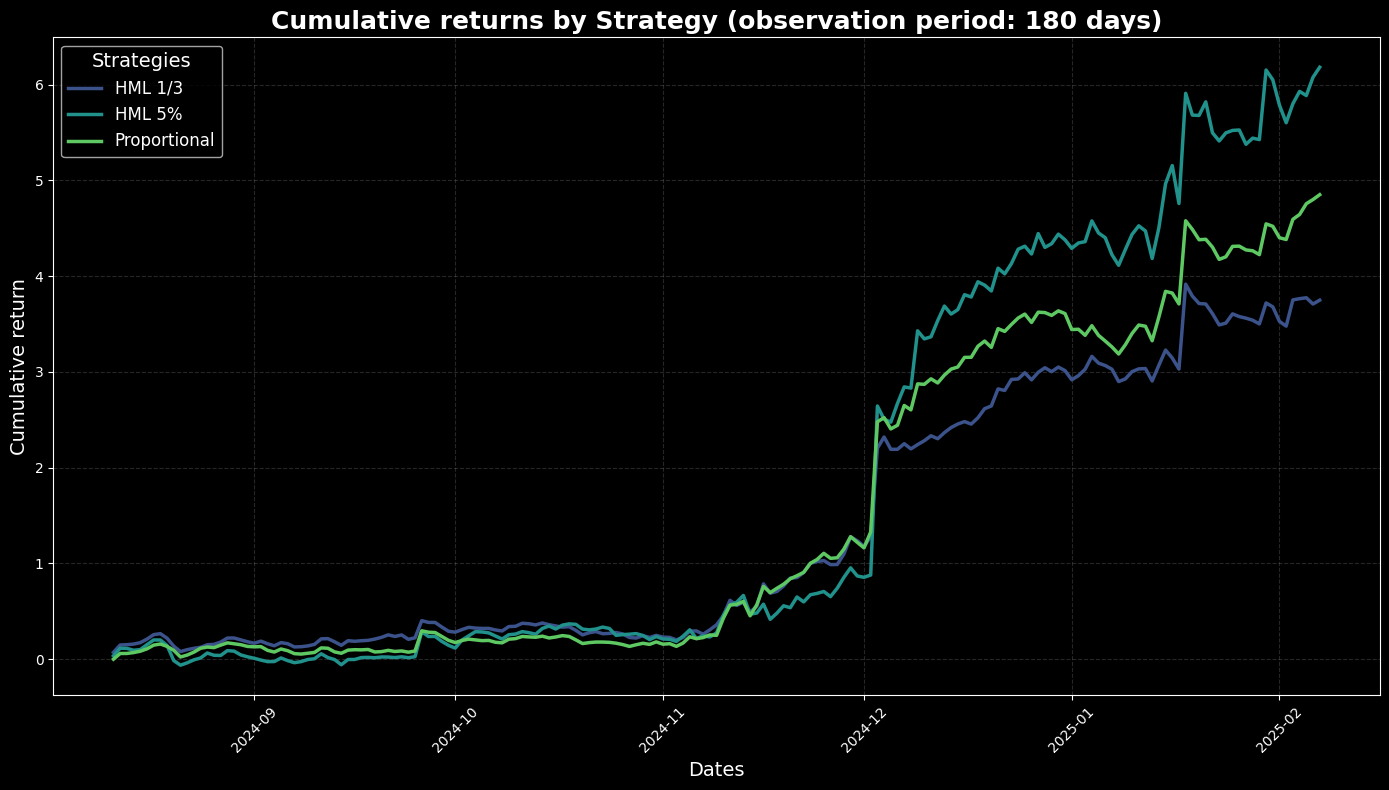

In [143]:
# Tracé des rendements cumulés
plot_cumulative_returns(results, dates) 

In [144]:
GRAPH_PATH = r"C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\cumulative_returns.png"
plot_cumulative_returns(results, dates, save_path=GRAPH_PATH)


✅ Graphique sauvegardé avec succès : C:\Users\kadas\Desktop\Mes_cours\FINANCE_QUAN\Projet_finance_quantitative\data\raw\cumulative_returns.png
